<a href="https://colab.research.google.com/github/nguyenhaidang94/titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

# Data Exploration

In [ ]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
print(f"Number of samples in train: {train.shape[0]}, number of features: {train.shape[1]}")
print(f"Number of samples in test: {test.shape[0]}, number of features: {test.shape[1]}")

Number of samples in train: 891, number of features: 12
Number of samples in test: 418, number of features: 11


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


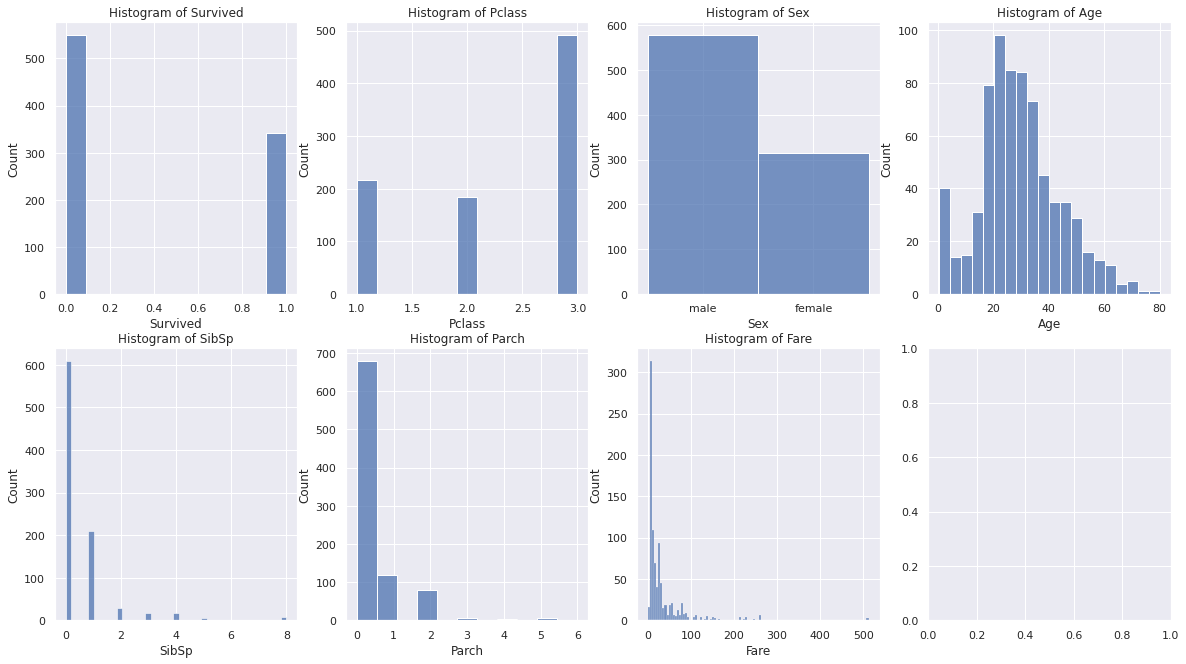

In [ ]:
plot_features = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
fig, axes = plt.subplots(2, 4, figsize=(20, 11))
axes = np.ravel(axes)
for i in range(len(plot_features)):
    sns.histplot(data=train, ax=axes[i], x=plot_features[i])
    axes[i].set_title(f"Histogram of {plot_features[i]}")

# Pre-processing

In [ ]:
print("Missing values by features")
print("Training set:")
for feature in train.columns:
    print(f"{feature}: {train[feature].isna().sum()}")
print("\nTest set:")
for feature in test.columns:
    print(f"{feature}: {test[feature].isna().sum()}")

Missing values by features
Training set:
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2

Test set:
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


In [ ]:
categorical_features = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
print("Number of unique values by feature:")
for feature in categorical_features:
    print(f"{feature}: {len(train[feature].unique())}")

Number of unique values by feature:
PassengerId: 891
Pclass: 3
Name: 891
Sex: 2
Ticket: 681
Cabin: 148
Embarked: 4


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_features = ["Pclass", "Sex", "Cabin", "Embarked"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ohe", OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
X_train = preprocessor.fit_transform(train.drop(columns=["Survived"]))
X_test = preprocessor.transform(test)
Y_train = train["Survived"].values

In [ ]:
print(X_train.shape)
print(X_test.shape)

(891, 159)
(418, 159)


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = LogisticRegression(fit_intercept=False, solver="liblinear")
param_grid = {"C": [10, 15, 20, 25, 30]}
logit_clf = GridSearchCV(estimator, param_grid, n_jobs=-1, refit=True, cv=5)
logit_clf.fit(X_train, Y_train)
print(f"Best param: {logit_clf.best_params_}")
print(f"Best score: {logit_clf.best_score_}")
print(f"Score in training: {logit_clf.score(X_train, Y_train)}")

Best param: {'C': 25}
Best score: 0.8047078023978406
Score in training: 0.8552188552188552


In [ ]:
submission = pd.DataFrame()
submission["PassengerId"] = test["PassengerId"]
submission["Survived"] = logit_clf.predict(X_test)
submission.to_csv("titanic_logit_submission.csv", index=False)

# XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [ ]:
estimator = xgb.XGBClassifier(tree_method="gpu_hist", n_jobs=-1)
param_grid = {
    "n_estimators": [50, 100, 150], "max_depth": [5, 7, 9],
    "learning_rate": [0.01, 0.1, 0.3, 0.5], "reg_lambda": [1, 3, 5]
}
gridsearch = GridSearchCV(estimator, param_grid, n_jobs=-1, refit=False, cv=5)
gridsearch.fit(X_train, Y_train)
print(f"Best param: {gridsearch.best_params_}")
print(f"Best score: {gridsearch.best_score_}")

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best param: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50, 'reg_lambda': 1}
Best score: 0.8372795179210344


In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=50, max_depth=9, learning_rate=0.1, reg_lambda=1, tree_method="gpu_hist", n_jobs=-1)
xgb_clf.fit(X_train, Y_train)
print(f"Score in training: {xgb_clf.score(X_train, Y_train)}")

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score in training: 0.920314253647587


In [ ]:
submission = pd.DataFrame()
submission["PassengerId"] = test["PassengerId"]
submission["Survived"] = xgb_clf.predict(X_test)
submission.to_csv("titanic_xgb_submission.csv", index=False)